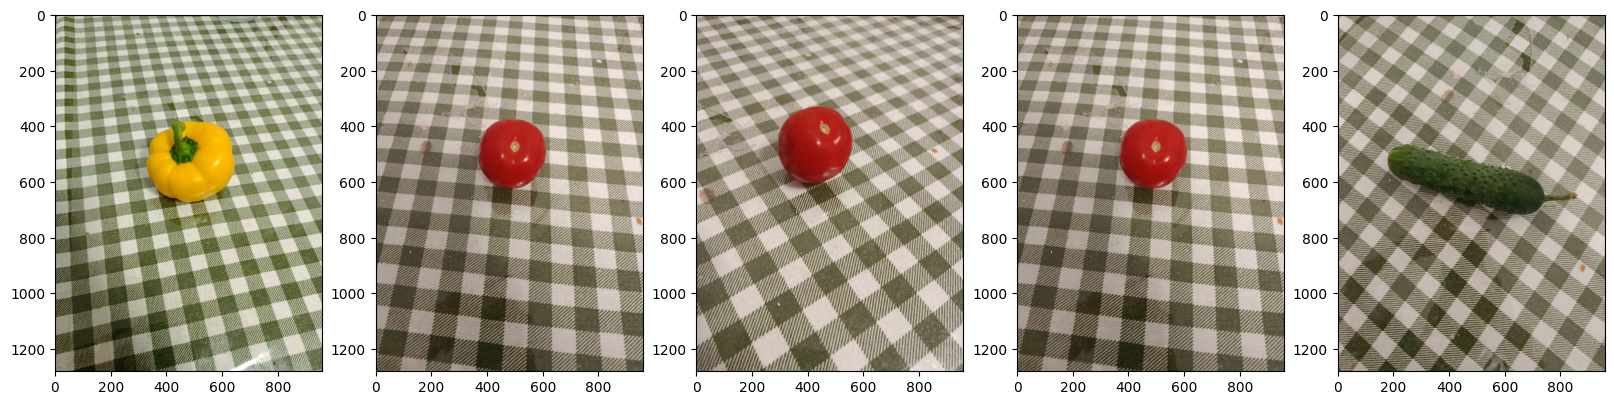

In [182]:
# Extract photos from test folder
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def show_plt(images: list[np.ndarray]):
    size = len(images)

    if size > 1:
        fig, axs = plt.subplots(1, size)

        fig.set_figwidth(4 * size)

        for i, img in enumerate(images):
            if img.ndim == 2:
                axs[i].imshow(img, "gray")
            else:
                axs[i].imshow(img)
        
        plt.show()
        plt.close()

    else:
        img = images[0]
        plt.figure(figsize=(5, 5))
        if img.ndim == 2:
            plt.imshow(img, "gray")
        else:
            plt.imshow(img)
        plt.show()
        plt.close()


images = []
for filename in os.listdir("./photos"):
    images.append(cv2.imread(f"./photos/{filename}", cv2.IMREAD_COLOR_RGB))

show_plt(images[:5])


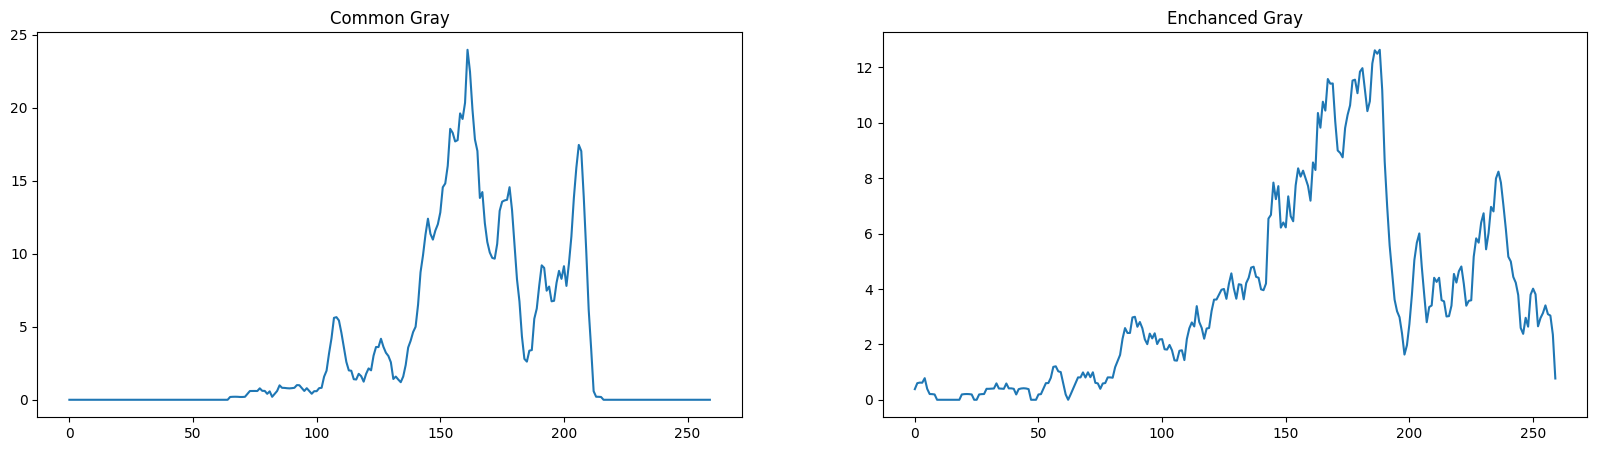

In [183]:
control_image = images[0]

gray = cv2.cvtColor(control_image, cv2.COLOR_RGB2GRAY)
color_enchanced = cv2.detailEnhance(control_image.copy())
gray_enchanced = cv2.cvtColor(color_enchanced, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist(gray, [0], None, [256], (0, 256))
hist_enchanced = cv2.calcHist(gray_enchanced, [0], None, [256], (0, 256))

g_kernel = cv2.getGaussianKernel(5, 5)
hist = np.convolve(hist.squeeze(), g_kernel.squeeze())

hist_enchanced = np.convolve(hist_enchanced.squeeze(), g_kernel.squeeze())

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.plot(hist)
plt.title("Common Gray")

plt.subplot(122)
plt.plot(hist_enchanced)
plt.title("Enchanced Gray")

plt.show()

# show_plt([gray, gray_enchanced])

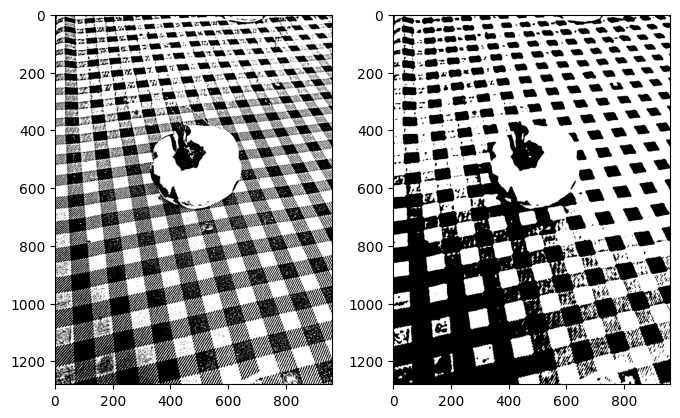

In [184]:
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)
g_gray_enchanced = cv2.GaussianBlur(gray_enchanced, (15, 15), 0)

mask1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
mask2 = cv2.threshold(gray_enchanced, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

mask3 = cv2.threshold(g_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
mask4 = cv2.threshold(g_gray_enchanced, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

show_plt([mask2, mask4])

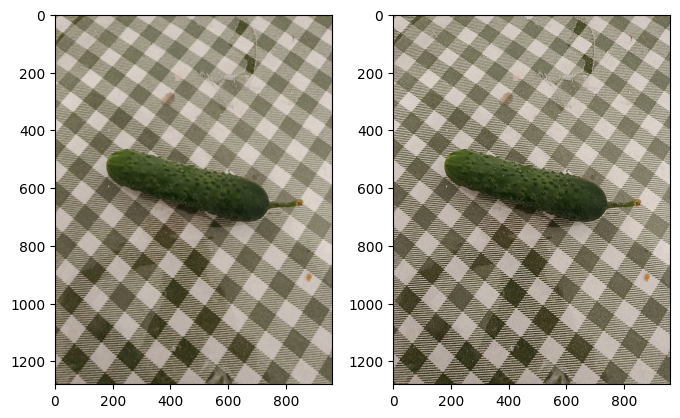

In [185]:
control_image_2 = images[4]

laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

laplac_img = cv2.filter2D(control_image_2, cv2.CV_32F, laplacian_kernel)
sharp = np.float32(control_image_2)

result = sharp - laplac_img

result = np.clip(result, 0, 255)
result = result.astype('uint8')
laplac_img = np.clip(laplac_img, 0, 255)
laplac_img = np.uint8(laplac_img)

show_plt([control_image_2, result])

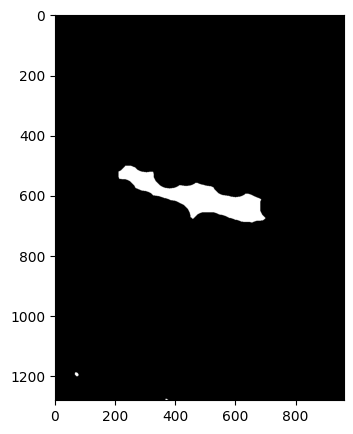

In [186]:
binary_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
binary_image = cv2.bitwise_not(binary_image)

_, binary_image = cv2.threshold(binary_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

dist = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

_, dist = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)

circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))

cv2.morphologyEx(dist, cv2.MORPH_CLOSE, circle_kernel, dist, iterations=2)

show_plt([dist])

In [247]:
# Final Function
def segment_object(image: np.ndarray, ksize, iterations):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

    laplac_img = cv2.filter2D(image, cv2.CV_32F, laplacian_kernel)
    sharp = np.float32(image)

    result = sharp - laplac_img

    result = np.clip(result, 0, 255)
    result = result.astype('uint8')
    laplac_img = np.clip(laplac_img, 0, 255)
    laplac_img = np.uint8(laplac_img)

    binary_image = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.bitwise_not(binary_image)

    _, binary_image = cv2.threshold(binary_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    dist = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)
    cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

    _, dist = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)

    circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)

    cv2.morphologyEx(dist, cv2.MORPH_CLOSE, circle_kernel, dist, iterations=iterations)

    return dist

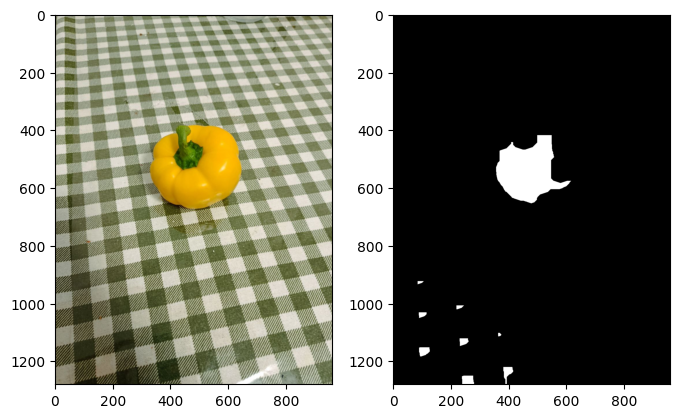

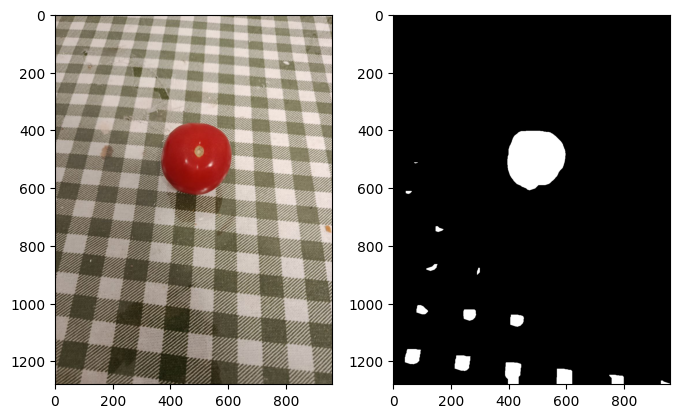

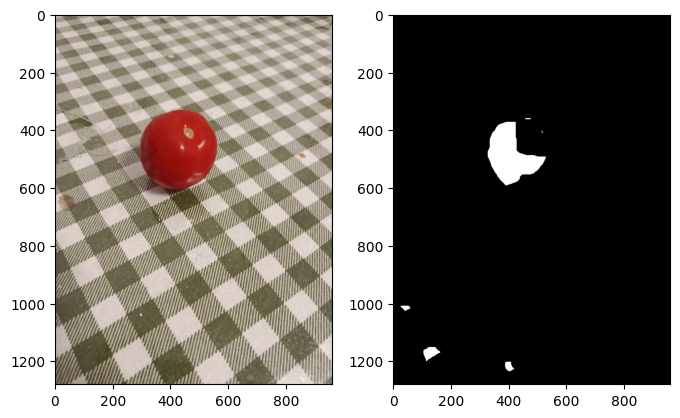

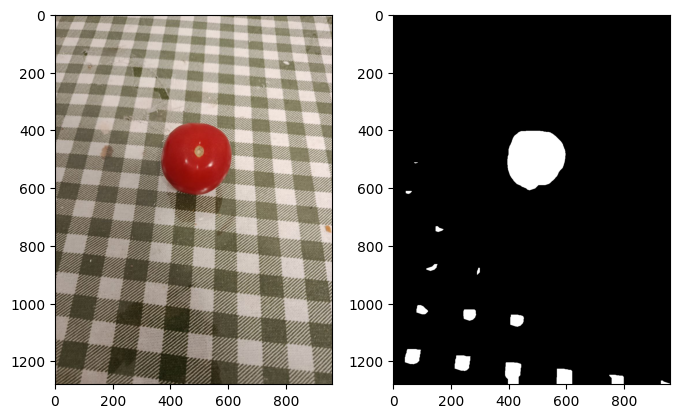

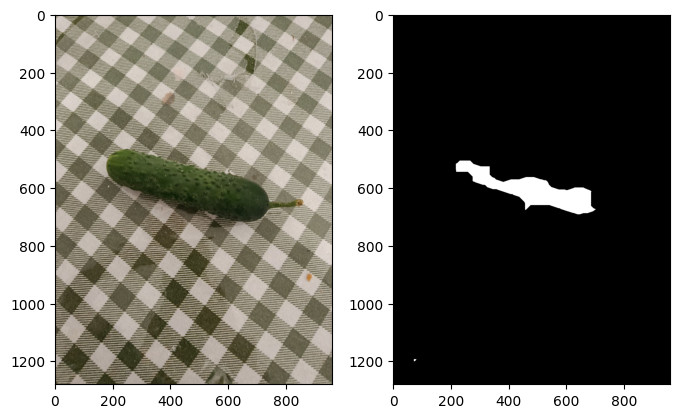

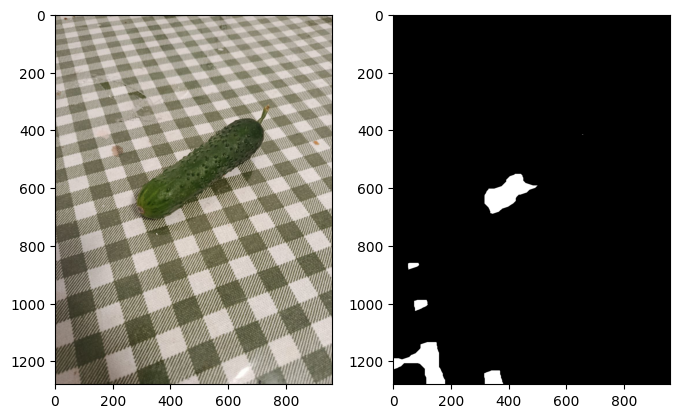

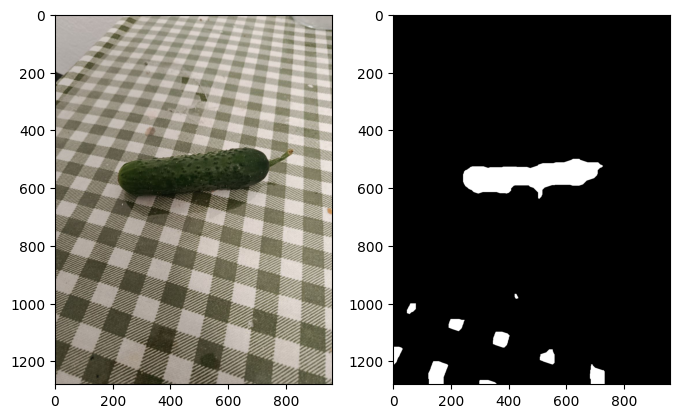

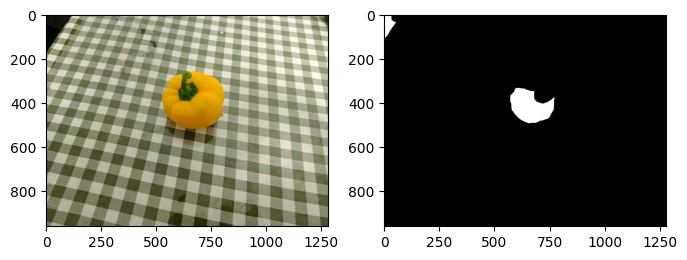

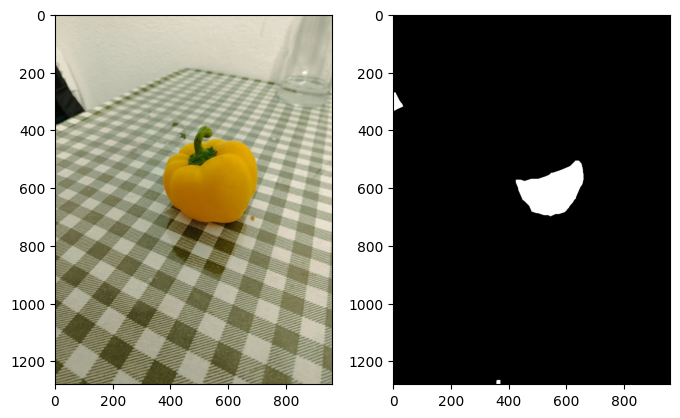

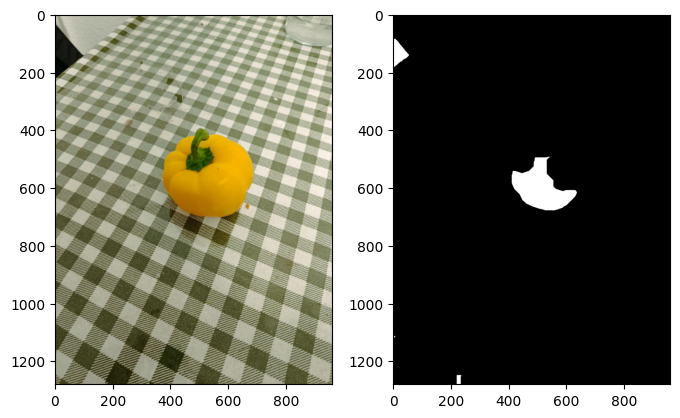

In [250]:

for image in images:
    show_plt([image, segment_object(image, (10, 10), 8)])
